In [1]:
import pandas as pd
df_train = pd.read_csv('kalimati-tarkari-prices-from-may-2021-to-september-2023.csv',)
df_train.columns = ["Commodity", "Date", "Unit","Minimum", "Maximum", "Average"]  
df_train

,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Indian),1/5/2021,Kg,50,60,55
1,Tomato Small(Local),1/5/2021,Kg,30,35,32.5
2,Tomato Small(Tunnel),1/5/2021,Kg,30,35,32.5
3,Tomato Small(Indian),1/5/2021,KG,40,45,42.5
4,Tomato Small(Terai),1/5/2021,KG,40,45,42.5
...,...,...,...,...,...,...
96474,Tomato Small(Indian),2023-09-28,KG,Rs 45.00,Rs 55.00,Rs 50.00
96475,Tomato Small(Local),2023-09-28,KG,Rs 50.00,Rs 60.00,Rs 55.00
96476,Tomato Small(Tunnel),2023-09-28,KG,Rs 60.00,Rs 75.00,Rs 69.00
96477,Turnip A,2023-09-28,KG,Rs 70.00,Rs 80.00,Rs 75.00


In [2]:
filtered_df = df_train[["Commodity","Average","Date"]]
filtered_df

,Commodity,Average,Date
0,Tomato Big(Indian),55,1/5/2021
1,Tomato Small(Local),32.5,1/5/2021
2,Tomato Small(Tunnel),32.5,1/5/2021
3,Tomato Small(Indian),42.5,1/5/2021
4,Tomato Small(Terai),42.5,1/5/2021
...,...,...,...
96474,Tomato Small(Indian),Rs 50.00,2023-09-28
96475,Tomato Small(Local),Rs 55.00,2023-09-28
96476,Tomato Small(Tunnel),Rs 69.00,2023-09-28
96477,Turnip A,Rs 75.00,2023-09-28


In [3]:
def convert_to_yyyy_mm_dd(date_str):
    try:
        return pd.to_datetime(date_str).strftime('%Y-%m-%d')
    except ValueError:
        return pd.to_datetime(date_str, format='%d/%m/%Y').strftime('%Y-%m-%d')

# Apply the custom function to the mixed date column
filtered_df['Date'] = filtered_df['Date'].apply(convert_to_yyyy_mm_dd)

C:\Users\Nawap Bastola\AppData\Local\Temp\ipykernel_14192\3145773156.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = filtered_df['Date'].apply(convert_to_yyyy_mm_dd)


In [4]:
filtered_df

,Commodity,Average,Date
0,Tomato Big(Indian),55,2021-01-05
1,Tomato Small(Local),32.5,2021-01-05
2,Tomato Small(Tunnel),32.5,2021-01-05
3,Tomato Small(Indian),42.5,2021-01-05
4,Tomato Small(Terai),42.5,2021-01-05
...,...,...,...
96474,Tomato Small(Indian),Rs 50.00,2023-09-28
96475,Tomato Small(Local),Rs 55.00,2023-09-28
96476,Tomato Small(Tunnel),Rs 69.00,2023-09-28
96477,Turnip A,Rs 75.00,2023-09-28


In [5]:
filtered_df['Average'] = filtered_df['Average'].apply(lambda x: float(x.replace('Rs', '')))
filtered_df

C:\Users\Nawap Bastola\AppData\Local\Temp\ipykernel_14192\2655419346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Average'] = filtered_df['Average'].apply(lambda x: float(x.replace('Rs', '')))


,Commodity,Average,Date
0,Tomato Big(Indian),55.00,2021-01-05
1,Tomato Small(Local),32.50,2021-01-05
2,Tomato Small(Tunnel),32.50,2021-01-05
3,Tomato Small(Indian),42.50,2021-01-05
4,Tomato Small(Terai),42.50,2021-01-05
...,...,...,...
96474,Tomato Small(Indian),50.00,2023-09-28
96475,Tomato Small(Local),55.00,2023-09-28
96476,Tomato Small(Tunnel),69.00,2023-09-28
96477,Turnip A,75.00,2023-09-28


In [10]:
tomato_big_df = filtered_df[filtered_df['Commodity']=='Tomato Big(Indian)']
tomato_big_df.head()

,Commodity,Average,Date
0,Tomato Big(Indian),55.0,2021-01-05
96,Tomato Big(Indian),55.0,2021-01-06
193,Tomato Big(Indian),47.5,2021-01-07
287,Tomato Big(Indian),52.5,2021-01-08
382,Tomato Big(Indian),45.0,2021-01-09


In [11]:
tomato_big_df.set_index('Date', inplace=True)

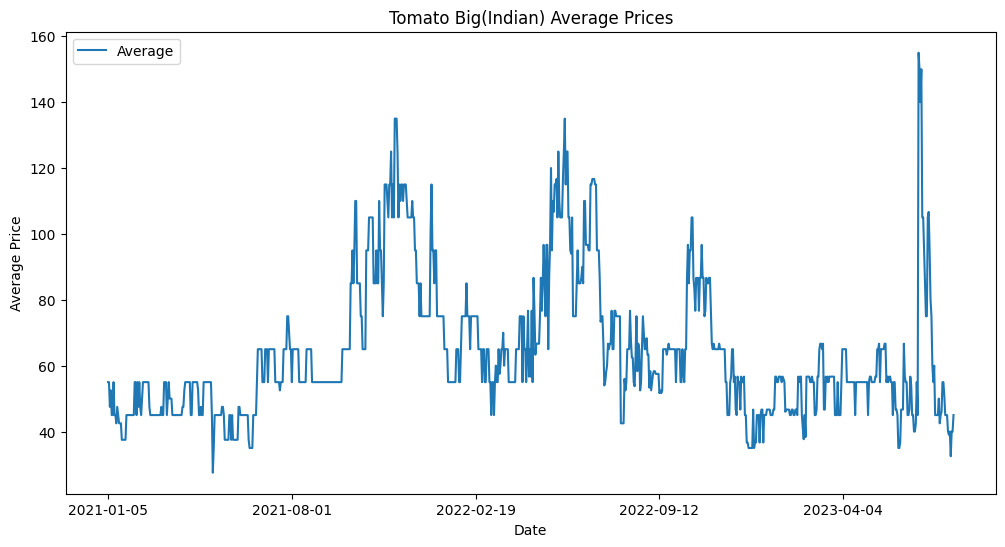

In [13]:
import matplotlib.pyplot as plt
tomato_big_df.plot(figsize=(12, 6))
plt.title('Tomato Big(Indian) Average Prices')
plt.ylabel('Average Price')
plt.show()


In [18]:
tomato_big_df.tail()

,Commodity,Average
Date,,
2023-09-24,Tomato Big(Indian),40.0
2023-09-25,Tomato Big(Indian),32.5
2023-09-26,Tomato Big(Indian),40.0
2023-09-27,Tomato Big(Indian),40.0
2023-09-28,Tomato Big(Indian),45.0


In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(tomato_big_df['Average'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4*30))
fitted_model = model.fit(disp=False, num_threads=-1)

print(fitted_model.summary())

forecast = fitted_model.forecast(steps=5)  
print('Forecasted Values:\n', forecast)

f:\Programs\anaconda3\envs\doc_sum\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
f:\Programs\anaconda3\envs\doc_sum\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
f:\Programs\anaconda3\envs\doc_sum\lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: num_threads. After release 0.14, this will raise.
  warnings.warn(


                                      SARIMAX Results                                      
Dep. Variable:                             Average   No. Observations:                  921
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 120)   Log Likelihood               -2906.839
Date:                             Fri, 15 Mar 2024   AIC                           5823.678
Time:                                     12:18:42   BIC                           5847.101
Sample:                                          0   HQIC                          5832.676
                                             - 921                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6737      0.056     12.123      0.000       0.565       0.783
ma.L1         -0.8562      

f:\Programs\anaconda3\envs\doc_sum\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
f:\Programs\anaconda3\envs\doc_sum\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [32]:
fitted_model.save('sarimax_model.pkl')

In [33]:
forecast = fitted_model.forecast(steps=365)  
forecast

f:\Programs\anaconda3\envs\doc_sum\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
f:\Programs\anaconda3\envs\doc_sum\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


921     44.072949
922     46.350922
923     44.966258
924     44.281694
925     46.440886
          ...    
1281    36.329669
1282    39.106796
1283    37.831834
1284    38.016614
1285    40.441973
Name: predicted_mean, Length: 365, dtype: float64

In [46]:
tomato_big_df.tail()

,Commodity,Average
Date,,
2023-09-24,Tomato Big(Indian),40.0
2023-09-25,Tomato Big(Indian),32.5
2023-09-26,Tomato Big(Indian),40.0
2023-09-27,Tomato Big(Indian),40.0
2023-09-28,Tomato Big(Indian),45.0


In [47]:
forecast_dates = pd.date_range(start='2023-09-29', periods=len(forecast), freq='D')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Average': forecast})
combined_df = pd.concat([tomato_big_df, forecast_df])

In [49]:
combined_df.tail()

,Commodity,Average,Date
1281,NaN,36.329669,2024-09-23
1282,NaN,39.106796,2024-09-24
1283,NaN,37.831834,2024-09-25
1284,NaN,38.016614,2024-09-26
1285,NaN,40.441973,2024-09-27


In [52]:
tomato_big_df['Date'] = tomato_big_df.index

C:\Users\Nawap Bastola\AppData\Local\Temp\ipykernel_14192\867617464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tomato_big_df['Date'] = tomato_big_df.index


In [72]:
val_data = pd.read_csv("df23.csv")
val_tomato = val_data[val_data['product']=='Tomato Big(Indian)']
val_tomato.head()

,product,date,min,max,avg
1,Tomato Big(Indian),2024-03-13,50.0,60.0,55.0
109,Tomato Big(Indian),2024-03-12,60.0,70.0,65.0
215,Tomato Big(Indian),2024-03-11,70.0,80.0,75.0
321,Tomato Big(Indian),2024-03-10,70.0,80.0,75.0
428,Tomato Big(Indian),2024-03-09,70.0,80.0,75.0


In [73]:
val_tomato['date'] = pd.to_datetime(val_tomato['date'])

C:\Users\Nawap Bastola\AppData\Local\Temp\ipykernel_14192\560331061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_tomato['date'] = pd.to_datetime(val_tomato['date'])


C:\Users\Nawap Bastola\AppData\Local\Temp\ipykernel_14192\2761994611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tomato_big_df['Date'] = pd.to_datetime(tomato_big_df['Date'])


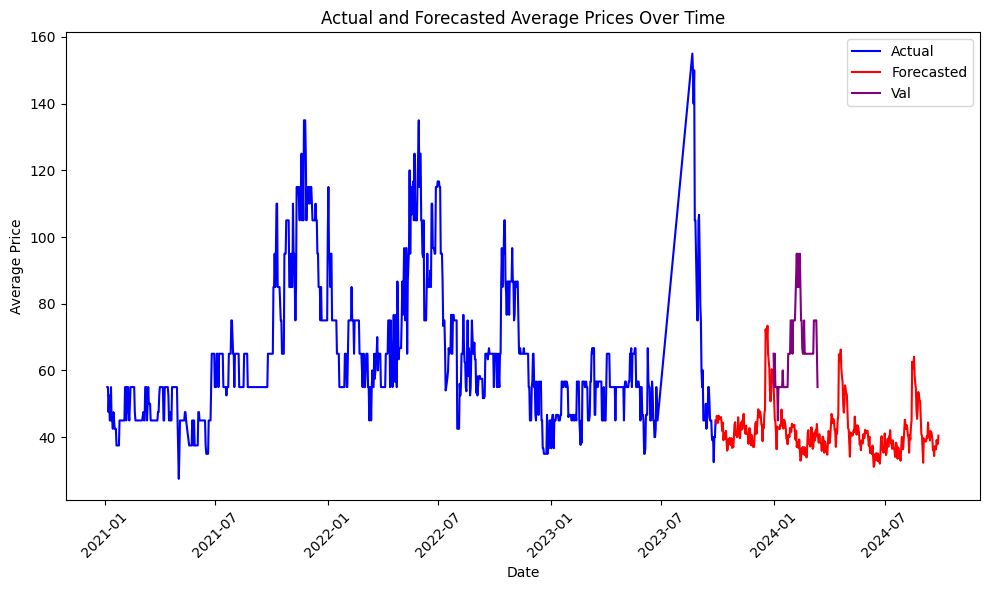

In [71]:
# Convert 'Date' column to datetime format
tomato_big_df['Date'] = pd.to_datetime(tomato_big_df['Date'])

# Plot the data with different colors for actual and forecasted
plt.figure(figsize=(10, 6))
plt.plot(tomato_big_df['Date'], tomato_big_df['Average'], color='blue', label='Actual')
plt.plot(forecast_df['Date'], forecast_df['Average'], color='red', label='Forecasted')
plt.plot(val_tomato['date'], val_tomato['avg'], color='purple', label='Val')

plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Actual and Forecasted Average Prices Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
forecast_df.head()

,Date,Average
921,2023-09-29,44.072949
922,2023-09-30,46.350922
923,2023-10-01,44.966258
924,2023-10-02,44.281694
925,2023-10-03,46.440886
